<a href="https://colab.research.google.com/github/advapplab/ICI-Line-Bot/blob/main/(trying%20to%20save%20colab%20to%20github)response_time_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pymongo
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 34.0 MB/s eta 0:00:00


In [ ]:
mgdb_host = "cluster0.4ftijun.mongodb.net"
mgdb_port = 27017
mgdb_username = 'ici_bot'
mgdb_password = 'Vc32gxFuYhqQm88p'
mgdb_database = "chatbot"
mgdb_collection = "history"
client = MongoClient('mongodb+srv://%s:%s@%s/%s' % (mgdb_username, mgdb_password, mgdb_host, mgdb_database))
database = client[mgdb_database]
collection = database[mgdb_collection]

In [ ]:
# Find all documents in the collection using an empty query object
all_documents = collection.find({})

# Convert the documents to a pandas DataFrame
df = pd.DataFrame(list(all_documents))

df1=(df['response_time'])
df1

0        NaN
1      1.547
2      0.434
3      2.918
4      2.643
       ...  
827    3.310
828    3.110
829    2.475
830    2.616
831    2.882
Name: response_time, Length: 832, dtype: float64

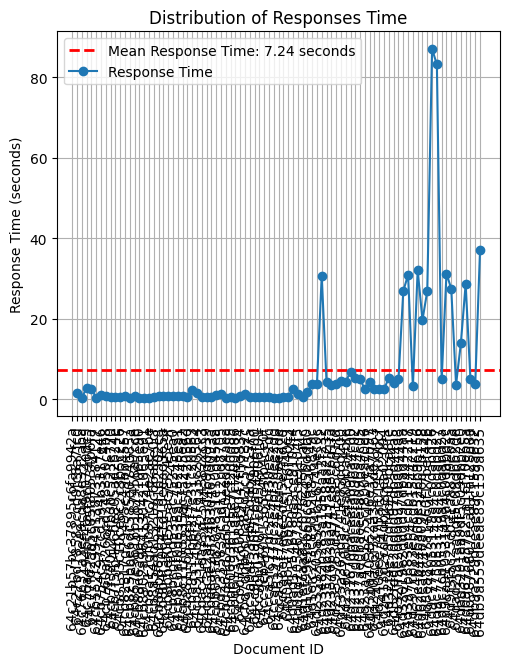

In [ ]:
# Calculate the mean response time
mean_response_time = df['response_time'].mean()
# Plot the line for the mean response time
plt.axhline(mean_response_time, color='red', linestyle='dashed', linewidth=2, label=f'Mean Response Time: {mean_response_time:.2f} seconds')

# Convert ObjectId to string for the '_id' column
df['_id'] = df['_id'].astype(str)

# Plot the response time data as a line plot
plt.plot(df['_id'], df['response_time'], marker='o', linestyle='-', label='Response Time')

# Set the labels and title
plt.xlabel('Document ID')
plt.ylabel('Response Time (seconds)')
plt.title('Distribution of Responses Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

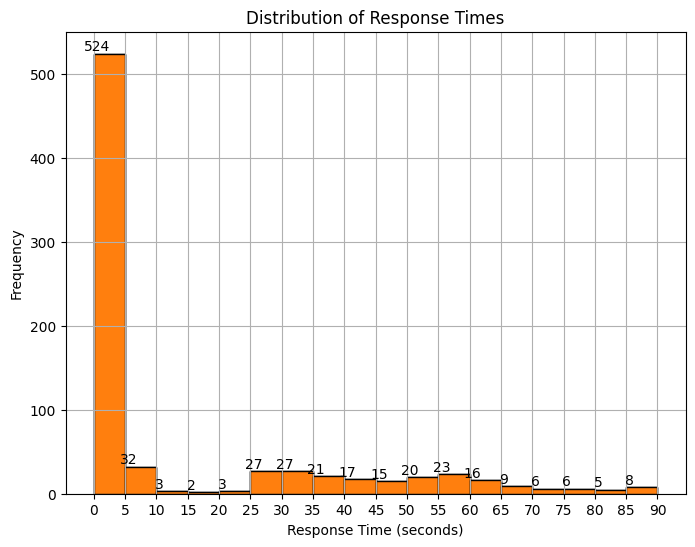

In [ ]:
# Define the bins for the histogram
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]  # Define your desired interval boundaries

# Plot the histogram
plt.figure(figsize=(8, 6))
hist_values, bin_edges, _ = plt.hist(df['response_time'], bins=bins, edgecolor='black')
plt.hist(df['response_time'], bins=bins, edgecolor='black')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times')
plt.grid(True)

# Set x-axis labels for the interval boundaries
plt.xticks(bins)

# Adding labels on top of each column
for bin_value, bin_edge in zip(hist_values, bin_edges[:-1]):
    plt.text(bin_edge + 0.5, bin_value, str(int(bin_value)), ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
client.close()